Vous allez découvrir ici comment j’ai créé un code en Python pour récupérer des paroles de chansons de Rohff et la façon dont je les ai étudiées grâce au text-mining, une méthode qui permet de transformer des textes en données.

La finalité est de :
- __Mesurer les sentiments dominants dans chacun de ses albums et les mots les plus utilisés dans ses textes.__
- __Mesurer sa dimension égotrip (je, moi, ect..)__
- __Mesurer à quel point cet artiste est devenu orgueilleux.__ 

## Import des bibliothèques

In [ ]:
from datetime import datetime
from glob import glob
import json
import os
import shutil
import time
import re

import pandas as pd

## API Genius

En effet, pour ce petit projet, j'aurai besoin de l'ensemble des textes de Rohff. 

J'ai pensé directement au site [Genuis](https://genius.com). plateforme connu pour blabla, j'utilisais bc ce site quand j'étais jeune (Key James, Youssoupha). J'ai bien vérifié et tout la discographie de notre artiste d'étude est disponible.

Je sais que Genuis a concus une API pour les developpeur, go l'utiliser ! 

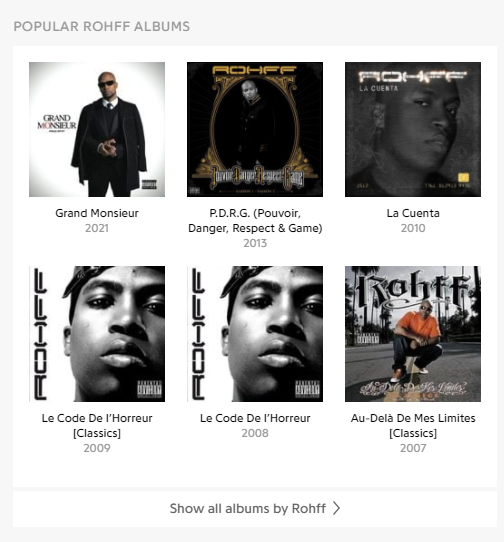

In [121]:
import lyricsgenius
GENIUS_API_TOKEN = "dj04TpKhldHudO8VnobaSSzXtuuZ2hbSgl1DW-1Jug6i1Tt33B0JjXhDzdAk6V7m"
genius = lyricsgenius.Genius(GENIUS_API_TOKEN)
genius

> 📦 DATA GENIUS : RÉCUPÉRATION DES PAROLES ET DES INFOS 

On va récupéré tout les sons (informations + paroles) de la discographie de rohff (ALbums + Singles). 

Ici la récupération de données se fera en 3 temps :

- Concernant les albums
    1. Récupérer les noms de chaque albums
    2. A l'aide de l'API de Genuis, récupérer les données et lyrics associé à chaque albums
    3. Importer le tout dataframe
- Concernant les singles
    1. Récupérer les noms de chaque singles (attention, des singles pas déjà présent dans les albums)
    2. A l'aide de l'API de Genuis, récupérer les données et lyrics associé à chaque sons
    3. Importer le tout dans un dataframe
- Fusionner les deux dataframes obtenu

## Query

## get artist genius

In [122]:
QUERY_ARTIST = "Diam’s"

def get_artist_from_query(q : str,index=0):
    data = genius.search_artists(q)

    ok_index = False
    while not ok_index:
        try:
            a = data['sections'][0]['hits'][index]["result"]
            ok_index = True
        except IndexError:
            ok_index = False
            index -= 1
    print(a)
    return a["id"],a['name'],a['url'],a["is_verified"],a['image_url']


ARTIST_GENIUS_ID,ARTIST_NAME,_,_,_ = get_artist_from_query(QUERY_ARTIST,index=0)
ARTIST_GENIUS_ID,ARTIST_NAME

{'_type': 'artist', 'api_path': '/artists/12061', 'header_image_url': 'https://images.genius.com/c2c8b1da7f5130e4ec51da1aff8cdf49.853x853x1.jpg', 'id': 12061, 'image_url': 'https://images.genius.com/c2c8b1da7f5130e4ec51da1aff8cdf49.853x853x1.jpg', 'index_character': 'd', 'is_meme_verified': False, 'is_verified': False, 'name': 'Diam’s', 'slug': 'Diams', 'url': 'https://genius.com/artists/Diams'}


(12061, 'Diam’s')

In [123]:
def create_folder(where, name_new_folder=None):
    new_folder_path = where + "/" + name_new_folder if name_new_folder else where
    if not os.path.exists(new_folder_path):
        os.mkdir(new_folder_path)
        return new_folder_path
    else:
        return new_folder_path

In [124]:
WORKSPACE_FOLDER_PATH = "/data/workspace_files"

## import json files from api

In [125]:
def get_all_songs_from_artist(artist_name, artist_id,try_how_many=10,sleep_sec=5,max_songs=None):
    if try_how_many > 0:
        try:
            artist = genius.search_artist(artist_name=artist_name,artist_id=artist_id, max_songs=max_songs,include_features=False)
            return artist.songs
        except Exception as e:
            print(f"Error : {e}... att {sleep_sec}sec ⌛")
            try_how_many -= 1
            time.sleep(sleep_sec)
            return get_all_songs_from_artist(artist_name, artist_id,try_how_many,sleep_sec)
        return artist.songs
    else:
        return None

print(ARTIST_GENIUS_ID,ARTIST_NAME)
songs = get_all_songs_from_artist(artist_name=ARTIST_NAME, artist_id=ARTIST_GENIUS_ID)
len(songs)

12061 Diam’s
Song 1: "Si c’était le dernier"
Song 2: "La boulette"
Song 3: "Confessions nocturnes"
Song 4: "Cœur de bombe"
Song 5: "Enfants du désert"
Song 6: "Jeune demoiselle"
Song 7: "Par amour"
Song 8: "Dans le noir"
Song 9: "Ma France à moi"
Song 10: "Marine"
Song 11: "S.O.S"
Song 12: "Dans ma bulle"
Song 13: "Car tu portes mon nom"
Song 14: "Petite Banlieusarde"
Song 15: "Poussière"
Song 16: "DJ"
Song 17: "T.S."
Song 18: "I Am Somebody"
Song 19: "Ma souffrance"
Song 20: "Mélanie"
Song 21: "Peter Pan"
Song 22: "L’Honneur d’un Peuple"
Song 23: "Feuille blanche"
Song 24: "Big up"
Song 25: "Sur la tête de ma mère"
Song 26: "Me revoilà"
Song 27: "Cause à effet"
Song 28: "Venus"
Song 29: "Mon répertoire"
Song 30: "Lili"
Song 31: "Rose du bitume"
Song 32: "Cruelle à vie"
Song 33: "Evasion"
Couldn't find the lyrics section. Please report this if the song has lyrics.
Song URL: https://genius.com/Diams-confessions-nocturnes-live-2006-lyrics
Song 34: "Confessions nocturnes - Live 2006"
Song

112

## write json files

In [126]:
for song in songs:
    #filename = f"lyrics_{song.artist}_{0}_{song.title}"
    song.save_lyrics(extension='json', overwrite=True, ensure_ascii=False, sanitize=True, verbose=True)

Wrote lyrics_diams_sicétaitledernier.json.
Wrote lyrics_diams_laboulette.json.
Wrote lyrics_diams_confessionsnocturnes.json.
Wrote lyrics_diams_cœurdebombe.json.
Wrote lyrics_diams_enfantsdudésert.json.
Wrote lyrics_diams_jeunedemoiselle.json.
Wrote lyrics_diams_paramour.json.
Wrote lyrics_diams_danslenoir.json.
Wrote lyrics_diams_mafranceàmoi.json.
Wrote lyrics_diams_marine.json.
Wrote lyrics_diams_s.o.s.json.
Wrote lyrics_diams_dansmabulle.json.
Wrote lyrics_diams_cartuportesmonnom.json.
Wrote lyrics_diams_petitebanlieusarde.json.
Wrote lyrics_diams_poussière.json.
Wrote lyrics_diams_dj.json.
Wrote lyrics_diams_t.s..json.
Wrote lyrics_diams_iamsomebody.json.
Wrote lyrics_diams_masouffrance.json.
Wrote lyrics_diams_mélanie.json.
Wrote lyrics_diams_peterpan.json.
Wrote lyrics_diams_lhonneurdunpeuple.json.
Wrote lyrics_diams_feuilleblanche.json.
Wrote lyrics_diams_bigup.json.
Wrote lyrics_diams_surlatêtedemamère.json.
Wrote lyrics_diams_merevoilà.json.
Wrote lyrics_diams_causeàeffet.jso

In [127]:
glob('[Ll]yrics_*.json', recursive=True)

['lyrics_diams_ungrammedefinesse.json',
 'lyrics_diams_déterminée.json',
 'lyrics_diams_toujourscettemêmemôme.json',
 'lyrics_diams_toutestécrit.json',
 'lyrics_diams_sangdencre.json',
 'lyrics_diams_t.s.live2006.json',
 'lyrics_diams_introfattaf2.json',
 'lyrics_diams_quandellenestpaslà.json',
 'lyrics_diams_showdjlive2006.json',
 'lyrics_diams_diamantcriminelle.json',
 'lyrics_diams_oneone.json',
 'lyrics_diams_jerap.json',
 'lyrics_diams_lesmainsenlairlive2006.json',
 'lyrics_diams_biguplive2006.json',
 'lyrics_diams_introductionlive2006.json',
 'lyrics_diams_brutdefemme.json',
 'lyrics_diams_chantdepaix.json',
 'lyrics_diams_feuilleblanchelive2006.json',
 'lyrics_diams_leretoursuzyft.diams.json',
 'lyrics_diams_températurelive2006.json',
 'lyrics_diams_madamefrance.json',
 'lyrics_diams_djlive2006.json',
 'lyrics_diams_saidetmohamed.json',
 'lyrics_diams_léveil.json',
 'lyrics_diams_lefléau.json',
 'lyrics_diams_outro.json',
 'lyrics_diams_banlieuesdumonde.json',
 'lyrics_diams_cap

In [128]:
WORKSPACE_FOLDER_PATH = create_folder(WORKSPACE_FOLDER_PATH,f"genius-{ARTIST_GENIUS_ID}-{re.sub('[^A-Za-z0-9]+', '',ARTIST_NAME.lower())}")
WORKSPACE_FOLDER_PATH

'/data/workspace_files/genius-12061-diams'

In [129]:
def move_all_lyrics_json_file(where):
    files = glob('[Ll]yrics_*.json', recursive=True)
    if files:
        for file_json in files:
            shutil.move(file_json, f"{where}/{file_json}")
        print(f"{len(files)} files moved to {where}")
    return where


where_dir_json = move_all_lyrics_json_file(WORKSPACE_FOLDER_PATH)

112 files moved to /data/workspace_files/genius-12061-diams


## create dataframe from all json songs

In [130]:
def get_df_from_one_json_file(json_path):
    with open(json_path) as f:  
        d_json = json.load(f)
        #print(d_json)
        
    #result = {"tracks" : d_json["tracks"],"release_date_components" : d_json["release_date_components"]}
    #for key in ["name","id","cover_art_url","url"]:
    #    result[f"album.{key}"] = d_json[key]
    return pd.json_normalize(d_json)
    #return pd.json_normalize(pd.json_normalize(result,"tracks",[x for x in result.keys() if x != "tracks"]).to_dict(orient="records"))


def get_df_from_all_json_files(dir_path):

    dfs = []
    files = [os.path.join(dir_path, f) for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))]
    for json_path in files:
        dfs.append(get_df_from_one_json_file(json_path))

    return pd.concat(dfs,ignore_index=True)
        
#where_dir_json = "/data/workspace_files/Davy One (12 songs lyrics json) [20221206]"
df_all_songs = get_df_from_all_json_files(where_dir_json)
df_all_songs

,annotation_count,api_path,artist_names,full_title,header_image_thumbnail_url,header_image_url,id,language,lyrics_owner_id,lyrics_state,...,lyrics_marked_complete_by.id,lyrics_marked_complete_by.iq,lyrics_marked_complete_by.login,lyrics_marked_complete_by.name,lyrics_marked_complete_by.role_for_display,lyrics_marked_complete_by.url,lyrics_marked_complete_by.current_user_metadata.permissions,lyrics_marked_complete_by.current_user_metadata.excluded_permissions,lyrics_marked_complete_by.current_user_metadata.interactions.following,album
0,63,/songs/58281,Diam's,Si c'était le dernier by Diam's,https://images.genius.com/7ec3217e04b4415d4d50...,https://images.genius.com/7ec3217e04b4415d4d50...,58281,de,42321,complete,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24,/songs/51096,Diam's,La boulette by Diam's,https://images.genius.com/c4dd2323b46f93629dd4...,https://images.genius.com/c4dd2323b46f93629dd4...,51096,fr,3639,complete,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16,/songs/80446,Diam's (Ft. Vitaa),Confessions nocturnes by Diam's (Ft. Vitaa),https://images.genius.com/64a92519eef6db52dbad...,https://images.genius.com/64a92519eef6db52dbad...,80446,fr,68630,complete,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,/songs/84209,Diam's,Cœur de bombe by Diam's,https://images.genius.com/f4464ce48d097273e0a4...,https://images.genius.com/f4464ce48d097273e0a4...,84209,fr,68630,complete,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25,/songs/84214,Diam's,Enfants du désert by Diam's,https://images.genius.com/4a59ea3f5e393a36e545...,https://images.genius.com/4a59ea3f5e393a36e545...,84214,fr,68630,complete,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0,/songs/8241263,Diam's,Sang d'encre by Diam's,https://images.genius.com/52e1c75eea296896dbe1...,https://images.genius.com/52e1c75eea296896dbe1...,8241263,fr,703783,complete,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,0,/songs/8505239,Diam's (Ft. Philo & Sinik),Tout est écrit by Diam's (Ft. Philo & Sinik),https://images.genius.com/c2c8b1da7f5130e4ec51...,https://images.genius.com/c2c8b1da7f5130e4ec51...,8505239,fr,703783,complete,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,0,/songs/4467931,Diam's,Toujours cette même môme by Diam's,https://images.genius.com/8798bb7cc9feb33ab0ca...,https://images.genius.com/8798bb7cc9feb33ab0ca...,4467931,fr,703783,complete,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,0,/songs/5548740,Diam's (Ft. Teddy Corona),Déterminée by Diam's (Ft. Teddy Corona),https://images.genius.com/45a562592416d9e6b2e8...,https://images.genius.com/45a562592416d9e6b2e8...,5548740,fr,703783,complete,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
df_all_songs.shape

(112, 129)

In [132]:
df_all_songs.sort_values(by=["release_date_components.year", "album.name"], inplace=True)
df_all_songs

,annotation_count,api_path,artist_names,full_title,header_image_thumbnail_url,header_image_url,id,language,lyrics_owner_id,lyrics_state,...,lyrics_marked_complete_by.id,lyrics_marked_complete_by.iq,lyrics_marked_complete_by.login,lyrics_marked_complete_by.name,lyrics_marked_complete_by.role_for_display,lyrics_marked_complete_by.url,lyrics_marked_complete_by.current_user_metadata.permissions,lyrics_marked_complete_by.current_user_metadata.excluded_permissions,lyrics_marked_complete_by.current_user_metadata.interactions.following,album
63,0,/songs/4188159,Diam's,Extrême Minée by Diam's,https://images.genius.com/c6888985a602e87b823b...,https://images.genius.com/c6888985a602e87b823b...,4188159,fr,7245690,complete,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,11,/songs/51103,Diam's,C'est toi qui m'gènes by Diam's,https://images.genius.com/446799a0a2ad2570aa77...,https://images.genius.com/446799a0a2ad2570aa77...,51103,fr,6383,complete,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,4,/songs/450351,Diam's,Rien à foutre by Diam's,https://images.genius.com/446799a0a2ad2570aa77...,https://images.genius.com/446799a0a2ad2570aa77...,450351,fr,867166,complete,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,1,/songs/1182566,Diam's,Diam's C'est Qui ? by Diam's,https://images.genius.com/446799a0a2ad2570aa77...,https://images.genius.com/446799a0a2ad2570aa77...,1182566,fr,703783,complete,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,7,/songs/105185,Diam's,Premier Mandat by Diam's,https://images.genius.com/446799a0a2ad2570aa77...,https://images.genius.com/446799a0a2ad2570aa77...,105185,fr,64332,complete,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,4,/songs/418249,Diam's,Maladif by Diam's,https://images.genius.com/c2c8b1da7f5130e4ec51...,https://images.genius.com/c2c8b1da7f5130e4ec51...,418249,fr,104021,complete,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
54,1,/songs/2007853,Diam's,La boulette (gŽnŽration nan nan) by Diam's,https://images.genius.com/c2c8b1da7f5130e4ec51...,https://images.genius.com/c2c8b1da7f5130e4ec51...,2007853,fr,1549345,complete,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
67,1,/songs/1808766,Diam's,C'est Toi Qui M'Gène by Diam's,https://images.genius.com/c2c8b1da7f5130e4ec51...,https://images.genius.com/c2c8b1da7f5130e4ec51...,1808766,fr,703783,complete,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
81,1,/songs/2002543,Diam's,La boulette (gŽnŽration nan nan) [version albu...,https://images.genius.com/c2c8b1da7f5130e4ec51...,https://images.genius.com/c2c8b1da7f5130e4ec51...,2002543,fr,1549345,complete,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [133]:
df_all_songs["media"]

63 [{'provider': 'youtube', 'start': 0, 'type': '...
42 [{'provider': 'youtube', 'start': 0, 'type': '...
49 [{'provider': 'youtube', 'start': 0, 'type': '...
50 [{'provider': 'youtube', 'start': 0, 'type': '...
51 [{'native_uri': 'spotify:track:7dpGOxCXPXvWgoC...
 ... 
48 []
54 []
67 []
81 []
111 [{'provider': 'youtube', 'start': 0, 'type': '...
Name: media, Length: 112, dtype: object

In [134]:
df_all_songs["artist_names"].value_counts()

Diam's 95
Diam's (Ft. Maïk (FRA)) 2
Diam's (Ft. Jacky) 1
Diam's (Ft. Philo & Sinik) 1
Diam's (Ft. Laure Milan) 1
Diam's (Ft. Anahy) 1
Diam's (Ft. China Moses) 1
Diam's (Ft. Admiral T) 1
Diam's (Ft. 113, Magic System & Mohamed Lamine) 1
Diam's (Ft. Vitaa) 1
Diam's (Ft. Vibe (Poêtes Hop Jazz)) 1
Diam's (Ft. Kennedy) 1
Diam's (Ft. Sous-Scellés) 1
Diam's (Ft. Heather B.) 1
Diam's (Ft. D.V. Alias Khryst) 1
Diam's (Ft. Driver) 1
Diam's (Ft. Teddy Corona) 1
Name: artist_names, dtype: int64

In [135]:
df_all_songs["album.name"].value_counts()

Premier mandat 18
Au tour de ma bulle 15
Dans ma bulle 15
S.O.S. 14
1980 13
Brut de femme 11
Salam 9
Talents Fâchés 2 1
Sang d’Encre 1
On revient choquer la France 1
L’hiphopée 1
Confrontation 1
Sachons Dire Non 1
Fat Taf 2 1
Street Lourd Hall Stars 1
Illicite projet 1
Têtes brûlées 1
Cut Killer Show 2 1
Talents fâchés Vol.1 1
Name: album.name, dtype: int64

In [136]:
df_all_songs.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 63 to 111
Data columns (total 129 columns):
 #    Column                                                                    Non-Null Count  Dtype  
---   ------                                                                    --------------  -----  
 0    annotation_count                                                          112 non-null    int64  
 1    api_path                                                                  112 non-null    object 
 2    artist_names                                                              112 non-null    object 
 3    full_title                                                                112 non-null    object 
 4    header_image_thumbnail_url                                                112 non-null    object 
 5    header_image_url                                                          112 non-null    object 
 6    id                                                     

<ipython-input-136-5aa5a8b17b30>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_all_songs.info(verbose=True, null_counts=True)


### to csv

In [137]:
output_file = "%s/df_genius_%s_all_songs_%s.csv" % (WORKSPACE_FOLDER_PATH, re.sub('[^A-Za-z0-9]+', '',ARTIST_NAME.lower()), datetime.now().strftime("%Y%m%d"))
df_all_songs.to_csv(output_file, index=False)
print(output_file)

/data/workspace_files/genius-12061-diams/df_genius_diams_all_songs_20221206.csv


Sur le script python, mettre un fichier text où j'enregistre le id des artiste déjà téléacher (id, nom, date) si la date est trop veille on maj